### Principal Component Analysis (PCA): Theory and Implementation

- Overview: 
    Principal Component Analysis (PCA) is a classical statistical technique used for dimensionality reduction, data exploration, and feature extraction. 
It transforms a large set of correlated variables into a smaller set of uncorrelated variables called principal components (PCs), which successively maximize the variance explained in the data. 
This reduces complexity while preserving as much information as possible.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


- Loading the dataset

In [2]:
data = pd.read_csv('/Users/imperator/Documents/STUDIES/UNIVERSITY OF GHANA/RESEARCH WORK/CORCHIL KELLY KWAME/PORTFOLIO OPTIMIZATION/PROJECT CODE/Dimensionality-Reduction-PortfolioOptimization/EDA/ETFs_datasets/Final_csv/5-cleaned_etf_data.csv')
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')
data = data.dropna(subset=['Date'])
data = data.sort_values(['Date', 'Ticker']).reset_index(drop=True)

# ssets and features (example batch)
assets = ['ARKK', 'AGG', 'GLD', 'HYG', 'SPY', 'USO', 'VNQ', 'VXUS']
features = ['Close', 'High', 'Low', 'Open', 'Volume', 'returns',
       'EMA_10', 'EMA_50', 'MACD', 'MACD_Signal', 'RSI_14', 'ATR_14',
       'Volatility_21', 'OBV', 'Max_Drawdown_21', 'Calmar_Ratio_21', 'Beta',
       'Alpha', 'ADX_14', 'DMI_plus_14', 'DMI_minus_14', 'cpi', 'core_cpi',
       'pce_price_index', 'real_gdp', 'industrial_production',
       'durable_goods_orders', 'unemployment_rate', 'nonfarm_payrolls',
       'jobless_claims', 'fed_funds_rate', 'treasury_10y', 'treasury_3m',
       'baa_yield', 'aaa_yield', 'consumer_credit', 'mortgage_rate_30y',
       'housing_starts', 'building_permits', 'new_home_sales',
       'umich_consumer_sentiment']

lookback = 20


- Reshaping the data before PCA

In [3]:
X_list, dates_list = [], []

for i in range(lookback, len(data)):
    cur_date = data.iloc[i]['Date']
    day_slice = data[data['Date'] == cur_date]
    if set(assets) <= set(day_slice['Ticker']):
        X_i = []
        valid = True
        for asset in assets:
            asset_slice = data[(data['Ticker'] == asset) & (data['Date'] <= cur_date)].tail(lookback)
            if len(asset_slice) == lookback:
                X_i.append(asset_slice[features].values)  # (lookback, n_features)
            else:
                valid = False
                break
        if valid:
            X_i = np.stack(X_i, axis=1)  # (lookback, n_assets, n_features)
            X_list.append(X_i)
            dates_list.append(cur_date)

X = np.array(X_list)  # (samples, lookback, n_assets, n_features)
dates = np.array(dates_list)

print(f"Data shape before PCA: {X.shape}")


Data shape before PCA: (18568, 20, 8, 41)


In [4]:
samples, lb, n_assets, n_features = X.shape
X_reshaped = X.reshape(-1, n_features)  # shape (samples*lookback*n_assets, n_features)
print(f"Shape for PCA: {X_reshaped.shape}")


Shape for PCA: (2970880, 41)


- Data Standardization

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reshaped)


- Explain Variance

In [10]:
from sklearn.decomposition import PCA

k = 12
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio by {k} PCs: {np.sum(pca.explained_variance_ratio_):.2%}")


Explained variance ratio by 12 PCs: 92.38%


In [11]:
X_pca_reshaped = X_pca.reshape(samples, lb, n_assets, k)
print(f"Data shape after PCA: {X_pca_reshaped.shape}")


Data shape after PCA: (18568, 20, 8, 12)


- Reshaping PCA scores

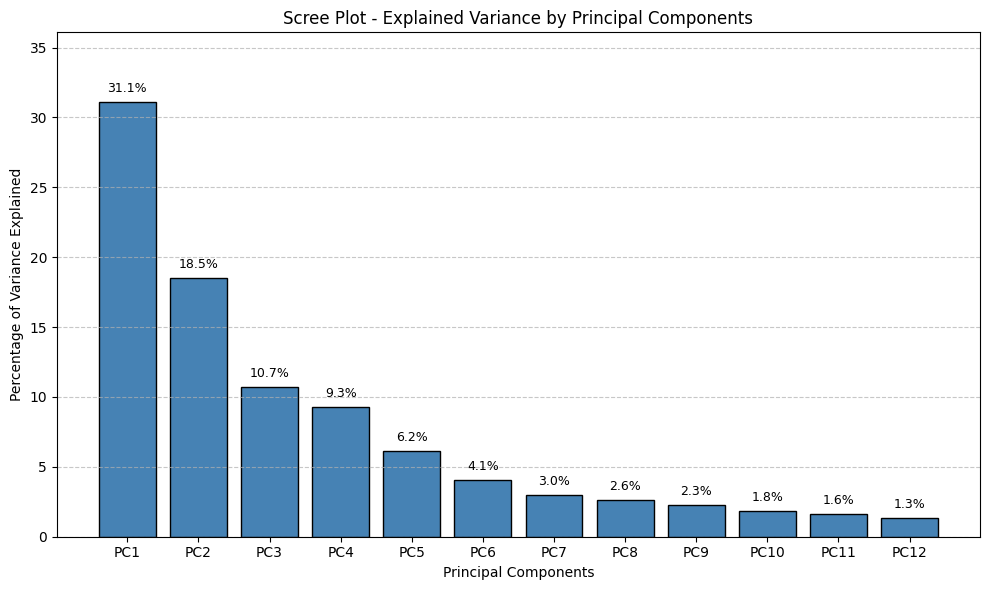

In [12]:
explained_var_pct = pca.explained_variance_ratio_ * 100
pc_labels = [f'PC{i+1}' for i in range(k)]

plt.figure(figsize=(10, 6))
bars = plt.bar(pc_labels, explained_var_pct, color='steelblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.title('Scree Plot - Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Variance Explained')
plt.ylim(0, max(explained_var_pct) + 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Cumulative Explained Variance

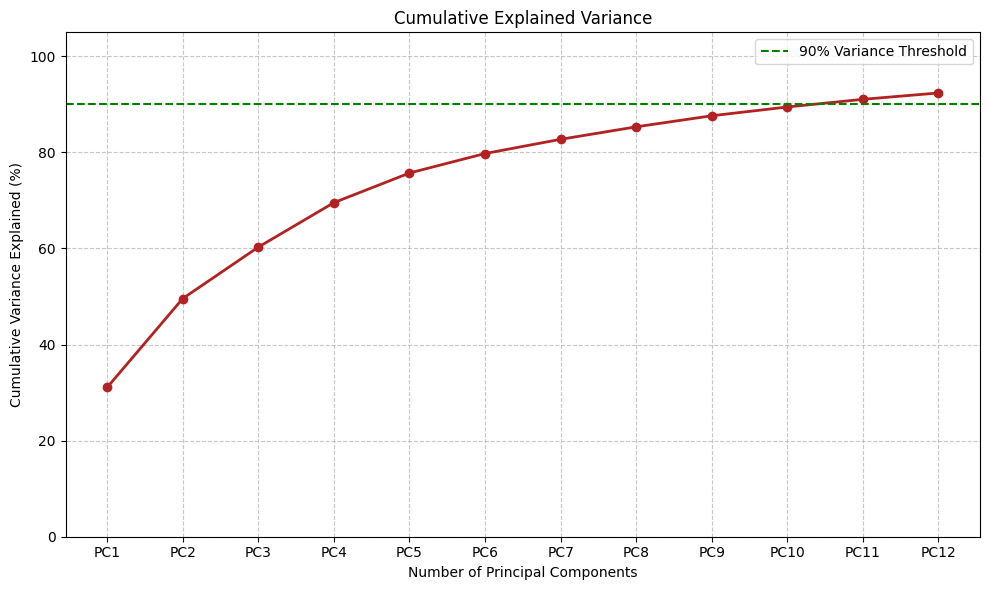

In [14]:
cum_var_pct = np.cumsum(explained_var_pct)

plt.figure(figsize=(10, 6))
plt.plot(pc_labels, cum_var_pct, marker='o', color='firebrick', linewidth=2)
plt.axhline(y=90, color='green', linestyle='--', label='90% Variance Threshold')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.ylim(0, 105)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


- Scree Plot (Eigen Valies)

Eigenvalues: [12.74764633  7.58406937  4.38817431  3.79527566  2.52745328  1.66365884
  1.21311372  1.065914    0.94396689  0.74935862  0.65317256  0.54330403]
Explained variance ratio: [0.3109181  0.18497724 0.10702861 0.09256767 0.06164518 0.04057703
 0.02958813 0.02599789 0.02302357 0.01827703 0.01593103 0.01325131]


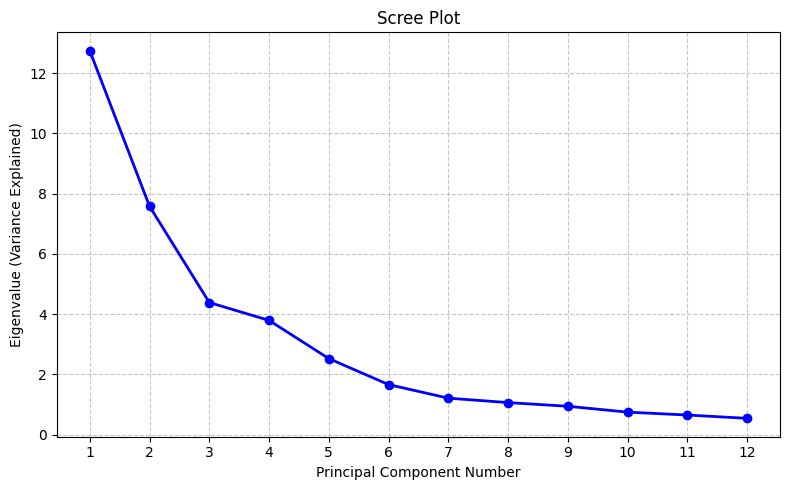

In [17]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)  # Fit PCA here

# Now you can access explained variance attributes
eigenvalues = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_

print("Eigenvalues:", eigenvalues)
print("Explained variance ratio:", explained_var_ratio)


# Assuming you have a fitted PCA object `pca` from sklearn
# Eigenvalues are the explained variance of each PC
eigenvalues = pca.explained_variance_

# Number of components
num_components = len(eigenvalues)
components = np.arange(1, num_components + 1)

plt.figure(figsize=(8, 5))
plt.plot(components, eigenvalues, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue (Variance Explained)')
plt.xticks(components)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- PCA Components Heatmap

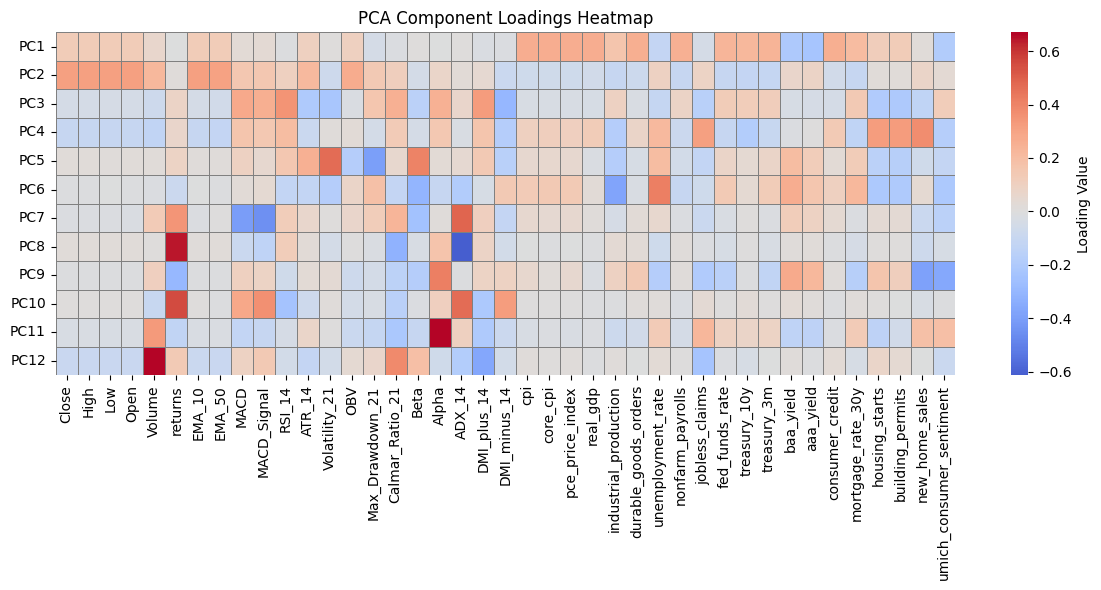

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'pca' is your fitted PCA object
# 'k' is the number of principal components you retained
# 'features' is the list of original feature names
# 'pc_labels' is a list like [f'PC{i+1}' for i in range(k)]

loadings = pca.components_  # shape: (k, n_features)

plt.figure(figsize=(12, 6))
sns.heatmap(loadings, cmap='coolwarm', center=0,
            yticklabels=pc_labels,
            xticklabels=features,
            cbar_kws={'label': 'Loading Value'},
            linewidths=0.5,
            linecolor='gray')
plt.title('PCA Component Loadings Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [18]:
df_pcs = pd.DataFrame(X_pca, columns=pc_labels)
df_pcs['Date'] = np.repeat(dates, lb * n_assets)[:len(df_pcs)]  # approximate date alignment

df_pcs.to_csv('principal_components_new.csv', index=False)
print("Saved principal components to 'principal_components.csv'")


Saved principal components to 'principal_components.csv'
